<a href="https://colab.research.google.com/github/Neha03024/Gradient-Boost/blob/main/Gradient_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('/content/gradientboost_dataset.csv')
print(df)

     House_Size_sqft  Num_Bedrooms  Num_Bathrooms  Location_Score  \
0               2428             3              2        7.849251   
1               1513             4              2        5.871399   
2                550             2              3        9.666928   
3               3326             4              3        4.076849   
4               1930             1              1        6.693597   
..               ...           ...            ...             ...   
195             1087             2              2        5.430501   
196             2122             2              1        3.225080   
197              841             3              3        8.836749   
198             2574             3              2        5.007747   
199             1145             2              3        5.633356   

     Age_of_House   Price  
0              24  561408  
1              19  391461  
2               1  320234  
3              38  613623  
4               5  437372  
.. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   House_Size_sqft  200 non-null    int64  
 1   Num_Bedrooms     200 non-null    int64  
 2   Num_Bathrooms    200 non-null    int64  
 3   Location_Score   200 non-null    float64
 4   Age_of_House     200 non-null    int64  
 5   Price            200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
df.describe()

,House_Size_sqft,Num_Bedrooms,Num_Bathrooms,Location_Score,Age_of_House,Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1964.220000,2.445000,1.915000,5.522848,24.250000,432946.075000
std,862.299842,1.092218,0.831403,2.684693,15.444421,134202.852745
min,524.000000,1.000000,1.000000,1.087938,0.000000,125753.000000
25%,1266.500000,1.000000,1.000000,3.066217,10.750000,327984.000000
50%,1897.500000,2.000000,2.000000,5.486877,24.000000,423800.500000
75%,2647.500000,3.000000,3.000000,7.766242,37.250000,528172.500000
max,3487.000000,4.000000,3.000000,9.974121,49.000000,710234.000000


In [ ]:
print(df.isnull().sum())

House_Size_sqft    0
Num_Bedrooms       0
Num_Bathrooms      0
Location_Score     0
Age_of_House       0
Price              0
dtype: int64


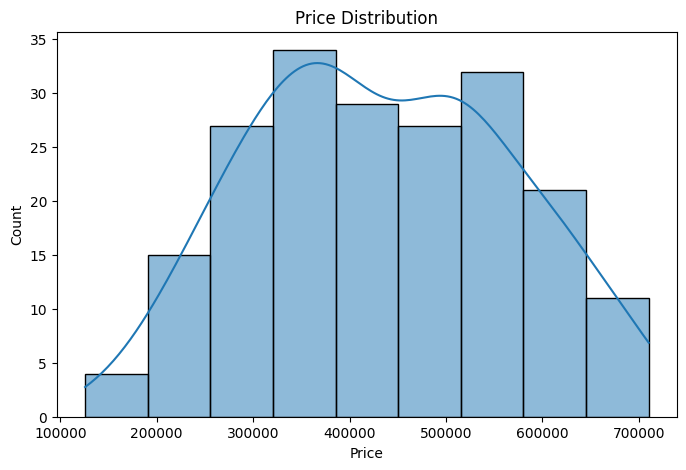

In [ ]:
# Plot Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

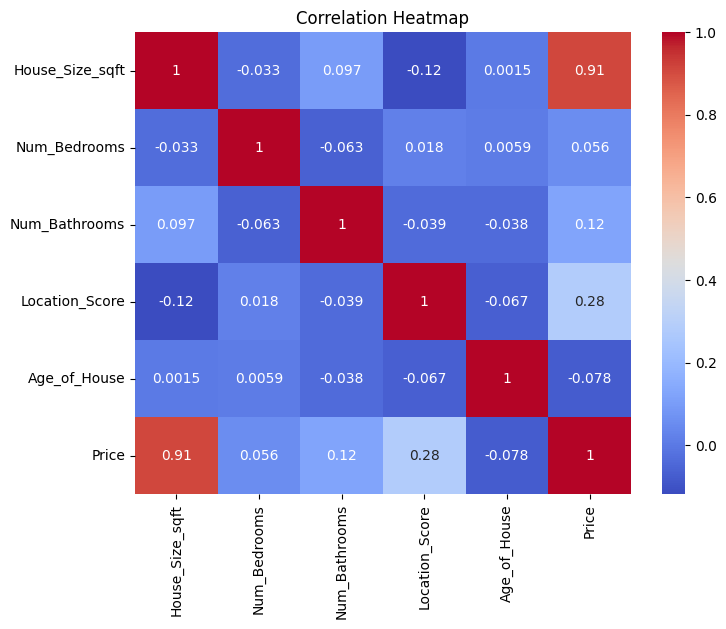

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

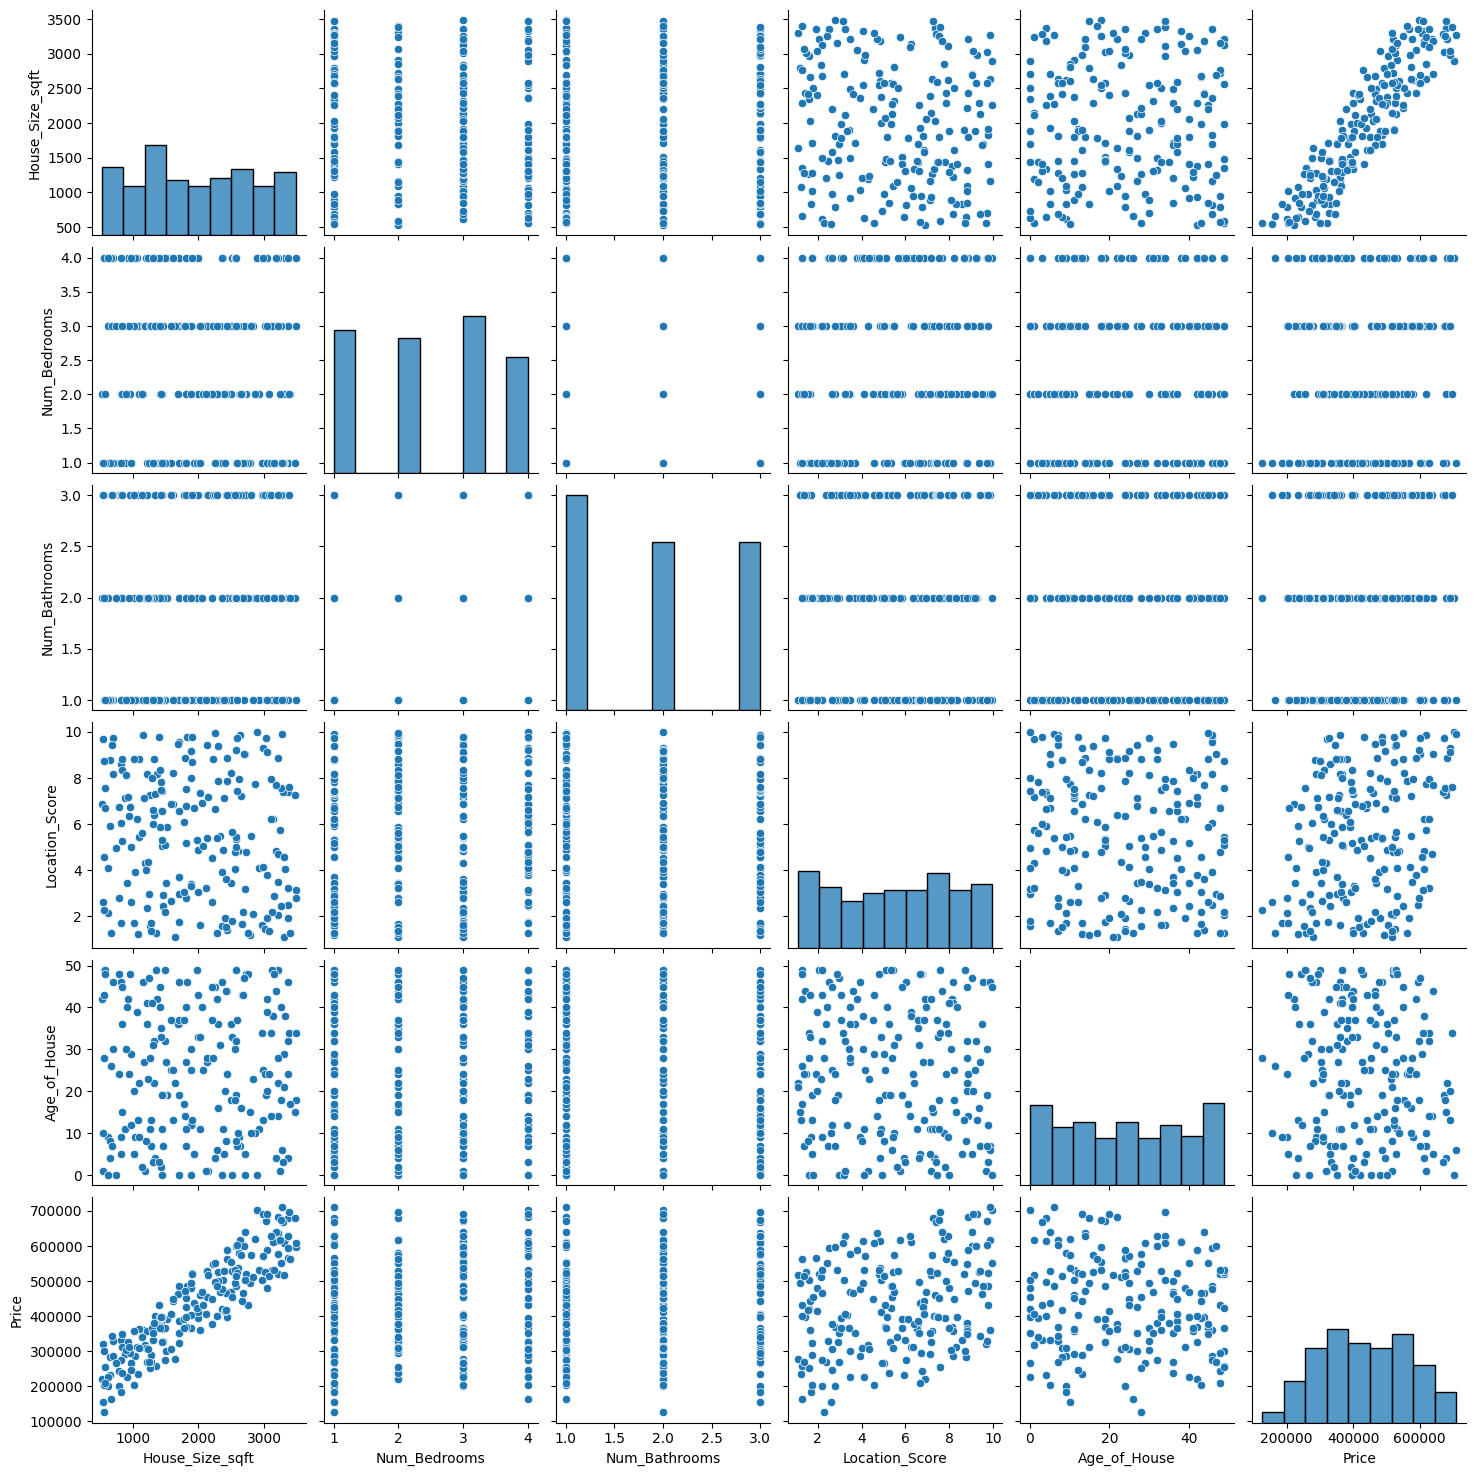

In [ ]:
# Pairplot
sns.pairplot(df)
plt.show()

In [ ]:
# ================================
# 4️⃣  Preprocessing
# ================================
# Separate features & target
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
# Normalize features (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# ================================
# 5️⃣  Train/Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# ================================
# 6️⃣  Train Gradient Boosting Model (Default)
# ================================
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# ================================
# 7️⃣  Model Evaluation
# ================================
y_pred = gb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Performance ---")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


--- Model Performance ---
MAE:  18233.55
MSE:  456141600.68
RMSE: 21357.47
R²:   0.98


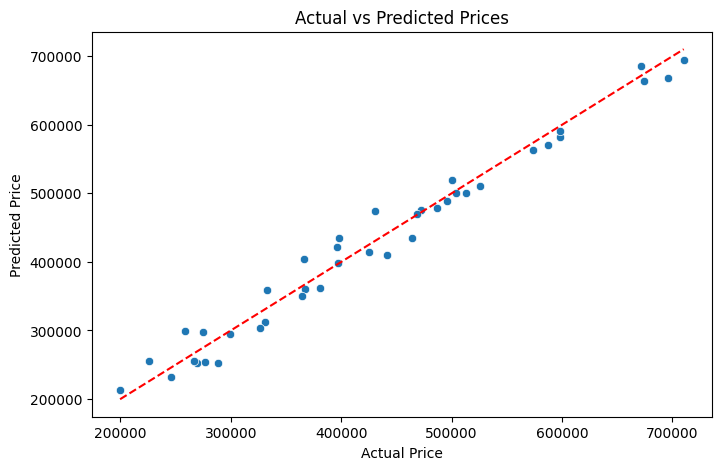

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # Line y=x for reference
plt.show()

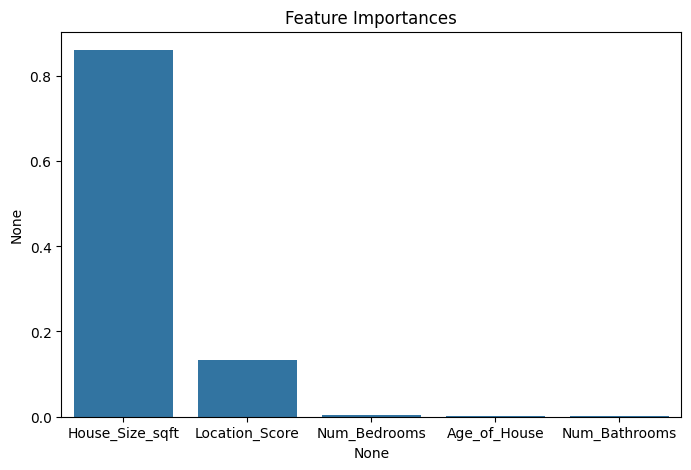

In [ ]:
# ================================
# 8️⃣  Feature Importance
# ================================
feature_importances = pd.Series(
    gb_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.index, y=feature_importances)
plt.title('Feature Importances')
plt.show()

In [ ]:
# ================================
# 9️⃣  BONUS: Hyperparameter Tuning
# ================================
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\n--- Best Parameters from GridSearchCV ---")
print(grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- Best Parameters from GridSearchCV ---
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.8}


In [ ]:
# Evaluate tuned model
best_gb = grid_search.best_estimator_
y_pred_best = best_gb.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("\n--- Tuned Model Performance ---")
print(f"MAE:  {mae_best:.2f}")
print(f"MSE:  {mse_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²:   {r2_best:.2f}")


--- Tuned Model Performance ---
MAE:  15910.98
MSE:  369484711.91
RMSE: 19221.99
R²:   0.98
